## Project Title: Predicting the genres of unlabeled music tracks.

### Introductiom:

> In the era of digital streaming, there’s an increasing need to categorize and recommend music based on genres. By analyzing various musical features extracted from tracks, we can delve deeper into their defining patterns. In this music genre classification project, we’ll work with a dataset containing various musical features extracted from tracks across different styles.
While this music genre classification dataset is extensive, it is incomplete. A significant portion of the records lacks specific genre information.

**Objective:**

The primary Objective of this project is to predict the genres of these unlabeled tracks.



## Data Dictionary

* `Tempo`: Beats per minute (BPM) of the track.

* `Dynamic Range`: The range between the quietest and loudest parts of a track, typically measured in decibels (dB).

* `Vocal Presence`: The prominence of vocals in a track.

* `Percussion Strength`: The intensity and presence of percussion instruments in a track, such as drums or cymbals.

* `String Instrument Detection`: The presence and prominence of string instruments like guitars, violins, or cellos in a track.

* `Electronic Element Presence`: The intensity and presence of percussion instruments in a track, such as drums or cymbals.

* `Rhythm Complexity`: The complexity and variation in a track's rhythm patterns, reflecting the intricacy of its beat and timing.

* `Drums Influence`: The drums contribution to the overall sound of a track, focusing on their impact rather than just presence.

* `Distorted Guitar`: The extent to which electronic sounds or synthesizers are used in a track.

* `Metal Frequencies`: The use of distorted guitar sounds, often associated with genres like rock or metal.

* `Ambient Sound Influence`: The use of ambient sounds in a track, which can add texture and atmospheric elements to the music.

* `Instrumental Overlaps`: How different instruments interplay and overlap in a track, indicating the complexity of its instrumental arrangement.

* `Genre`: The categorized genre of the track.


## Data Loading

Load the music dataset from `music_dataset_mod.csv` into a DataFrame using the `pd.read_csv` function.


In [1]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the music dataset in the 'music_dataset_mod.csv' from the file path into a DataFrame.
file_path = '/content/drive/MyDrive/datascience_365 Projects/music_dataset_mod.csv'
df_music = pd.read_csv(file_path)
df_music.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


## Data Exploration and Summarization

Perform exploratory data analysis (EDA) to understand the dataset, including checking for missing values, examining data types, and generating summary statistics for both numerical and non-numerical columns to understand the dataset's structure and content. Visualize the distribution of musical features and genres.


In [3]:
print("Data Types:")
print(df_music.dtypes)
print("\nMissing Values:")
print(df_music.isnull().sum())
print("\nSummary Statistics (Numerical):")
print(df_music.describe())
print("\nSummary Statistics (Non-numerical):")
print(df_music.describe(include='object'))

Data Types:
Tempo                          float64
Dynamics Range                 float64
Vocal Presence                 float64
Percussion Strength            float64
String Instrument Detection    float64
Electronic Element Presence    float64
Rhythm Complexity              float64
Drums Influence                float64
Distorted Guitar               float64
Metal Frequencies              float64
Ambient Sound Influence        float64
Instrumental Overlaps          float64
Genre                           object
dtype: object

Missing Values:
Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                         

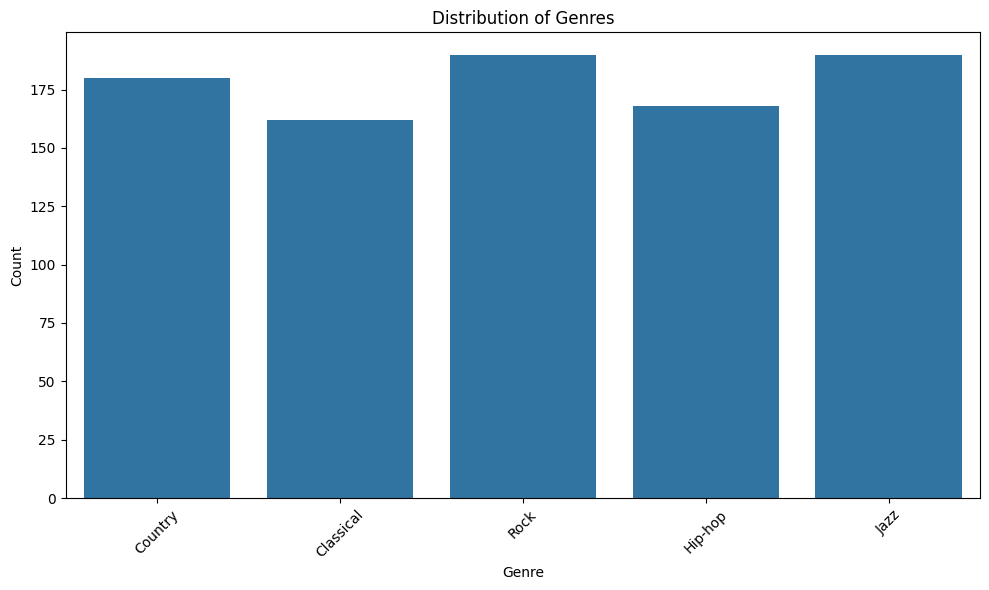

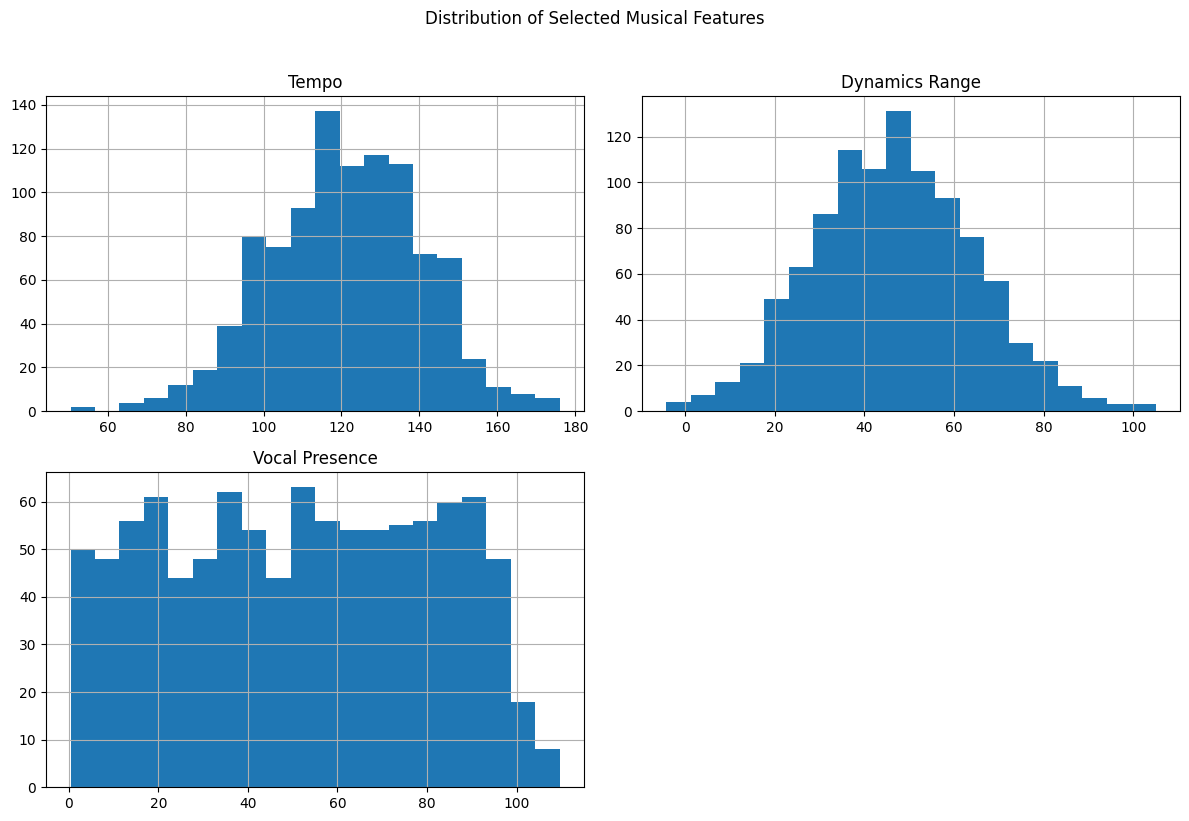

In [5]:
# Visualize the distribution of the 'Genre' column using a count plot.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_music, x='Genre')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the distribution of selected numerical features using histograms to
# understand their spread and identify potential outliers.
numerical_features = ['Tempo', 'Dynamics Range', 'Vocal Presence']
df_music[numerical_features].hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Selected Musical Features', y=1.02)
plt.tight_layout()
plt.show()

## EDA Summary

* **Total numbers of rows and columns in the dataset**: The dataset contains 1000 rows and 13 columns.
* **Numerical and categorical data types**: The dataset contains 12 numerical features and 1 categorical feature ('Genre').
* **Number of missing values**: There are 110 missing values in the 'Genre' column.
* **Summary statistics**: Numerical features show a wide range of values and distributions. The 'Genre' column has 5 unique values, with 'Rock' being the most frequent.
* **Outliers**: Histograms of selected numerical features suggest potential outliers, but further analysis would be needed for confirmation.

## Correlation Analysis and Insights

Analyze the correlation matrix of the musical features to identify relationships between them and gain insights into the data structure. Calculate and visualize the correlation matrix for the numerical features to understand their relationships.


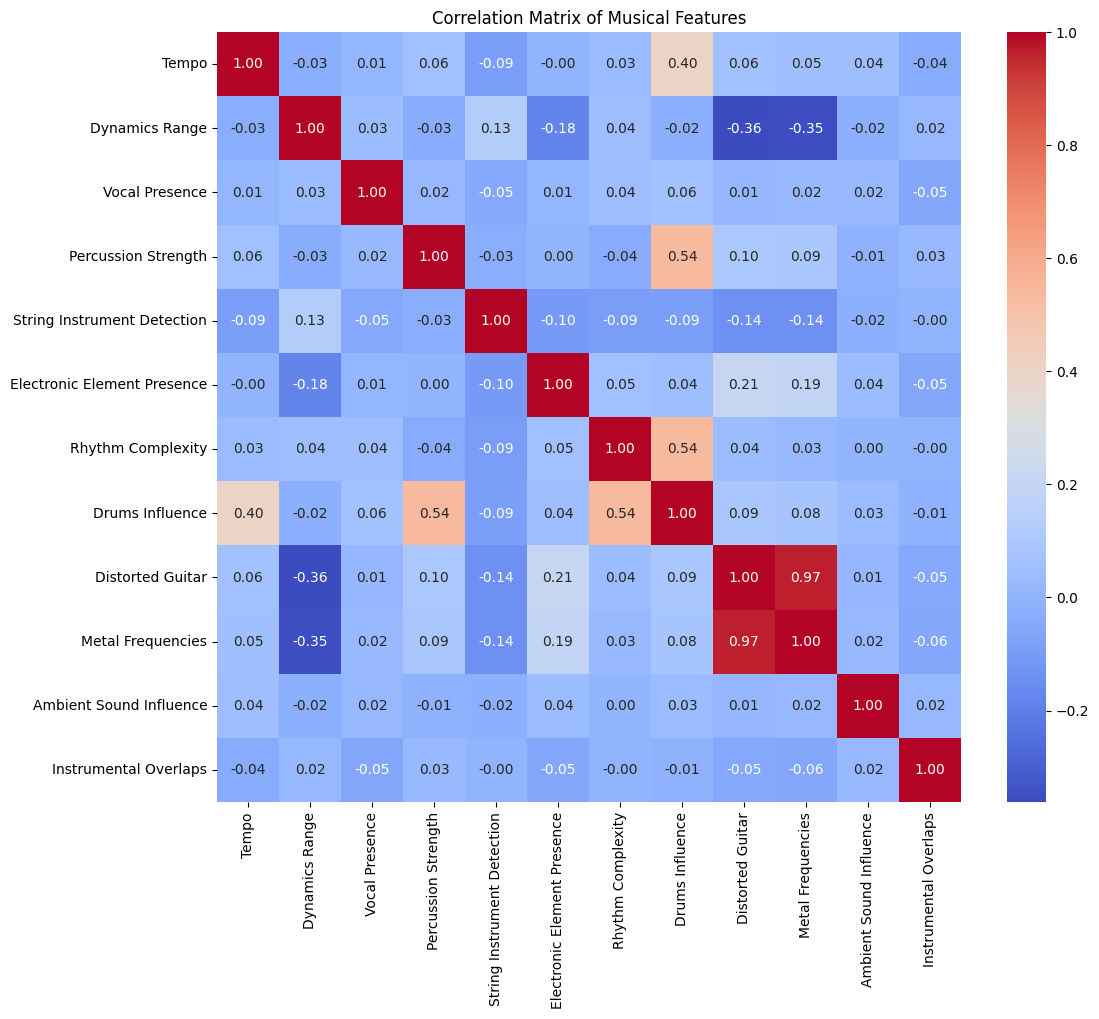

In [6]:
# Select the numerical features
numerical_df = df_music.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical features
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix for the numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Musical Features')
plt.show()

## Correlation Analysis Insights

Key insights from the correlation matrix visualization of the musical features:

* **Moderate positive correlation between 'Drums Influence' and 'Percussion Strength'.**

*  **Moderate positive correlation between 'Drums Influence' and 'Rhythm Complexity'.**

* **High positive correlation between 'Metal Frequencies' and 'Distorted Guitar'.**
* **Moderate positive correlations between 'Tempo' and 'Drums Influence'.**
* Some features show weak correlations with others.

## Data Preprocessing

Prepare the data for modeling, which may involve handling missing values, encoding categorical variables, and scaling numerical features. Separate the data into features (X) and target (y) for both labeled and unlabeled data.


In [7]:
# 1. Handle missing values in the 'Genre' column by dropping rows
df_cleaned = df_music.dropna(subset=['Genre'])

# 2. Separate the DataFrame into labeled and unlabeled
df_labeled = df_cleaned.copy()
df_unlabeled = df_music[df_music['Genre'].isnull()].copy()

# 3. For df_labeled, define features and target
X_labeled = df_labeled.drop('Genre', axis=1)
y_labeled = df_labeled['Genre']

# 4. For df_unlabeled, define features
X_unlabeled = df_unlabeled.drop('Genre', axis=1)

# 5. Identify categorical and numerical columns. Based on previous exploration,
# all feature columns are numerical. If there were categorical columns, we would
# handle them here (e.g., with OneHotEncoder).
categorical_cols_labeled = X_labeled.select_dtypes(include=['object']).columns
numerical_cols_labeled = X_labeled.select_dtypes(include=['number']).columns

categorical_cols_unlabeled = X_unlabeled.select_dtypes(include=['object']).columns
numerical_cols_unlabeled = X_unlabeled.select_dtypes(include=['number']).columns

# Assert that there are no categorical columns in this dataset
assert len(categorical_cols_labeled) == 0, "Categorical columns found in labeled features."
assert len(categorical_cols_unlabeled) == 0, "Categorical columns found in unlabeled features."


# 7. Scale the numerical features in both X_labeled and X_unlabeled
scaler = StandardScaler()

# Fit on labeled data and transform both
X_labeled_scaled = pd.DataFrame(scaler.fit_transform(X_labeled[numerical_cols_labeled]), columns=numerical_cols_labeled, index=X_labeled.index)
X_unlabeled_scaled = pd.DataFrame(scaler.transform(X_unlabeled[numerical_cols_unlabeled]), columns=numerical_cols_unlabeled, index=X_unlabeled.index)


# 8. Store the scaled features (already done in the previous step)
# Display the first few rows of the scaled dataframes to verify
print("Scaled Labeled Features (X_labeled_scaled):")
display(X_labeled_scaled.head())
print("\nScaled Unlabeled Features (X_unlabeled_scaled):")
display(X_unlabeled_scaled.head())


Scaled Labeled Features (X_labeled_scaled):


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
0,-0.322764,0.632363,0.053208,1.505236,-1.453223,-0.950834,-0.280198,-0.045318,0.986962,0.764935,1.536339,0.160377
1,-0.218345,1.267916,1.521895,1.223853,-0.364967,-1.952605,1.026807,1.273300,-1.441934,-1.465476,-1.153135,-1.161438
2,0.374045,0.351328,0.483068,1.689070,-1.743763,0.038642,-1.239678,0.051288,1.026300,1.260392,1.491653,-0.810444
3,0.383357,-1.176796,-1.298802,-0.510252,-0.350438,1.149519,0.461390,-0.704339,0.848311,0.904381,1.555966,1.631130
4,0.737250,-0.080654,1.718106,0.511789,1.668305,-0.702643,-0.792918,0.237599,-0.346907,-0.738672,0.085206,-0.645537



Scaled Unlabeled Features (X_unlabeled_scaled):


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
13,-0.842637,1.069599,-0.202177,0.021327,0.595904,0.194058,-0.994053,-0.936483,-1.435533,-1.465476,1.463902,-0.737693
18,-0.996267,0.067976,1.433608,0.412634,-1.244698,0.047829,-0.824751,-0.735750,0.526410,0.678484,-1.004820,1.556919
22,-1.821505,0.505970,1.016479,-1.147238,-1.444127,0.356525,0.306631,-1.786581,0.711454,0.991868,-1.047976,1.720027
31,0.006719,1.400624,-0.072552,0.940400,-0.351956,2.117501,0.468430,0.377238,1.478779,1.511771,-1.644147,-1.017726
42,-1.393741,-0.114692,0.168388,1.521792,1.720307,-0.574208,-0.218092,0.278725,1.537237,1.642977,-1.185331,0.218756


## PCA for Dimensionality Reduction

Apply Principal Component Analysis (PCA) to the feature data to reduce dimensionality while retaining most of the variance. Determine the optimal number of components. Calculate and plot the explained variance to determine the optimal number of components.


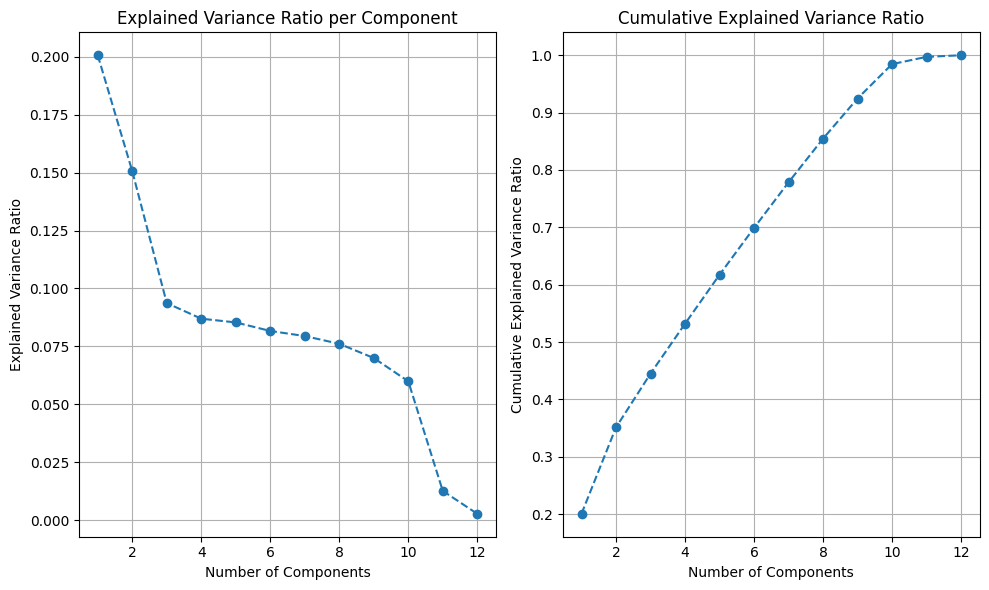

In [8]:
# Instantiate PCA with n_components=None
pca = PCA(n_components=None)

# Fit PCA to the scaled labeled feature data
pca.fit(X_labeled_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance and cumulative explained variance
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio per Component')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)

plt.tight_layout()
plt.show()

## PCA Insights

The plots generated from the PCA analysis provide insights into the dimensionality of the data and how much variance is captured by each principal component:

* **Explained Variance Ratio per Component:** This plot shows the proportion of the dataset's variance that lies along each principal component. The components are ordered by how much variance they explain, with the first component explaining the most. A sharp drop in variance explained after the first few components suggests that most of the information (variance) in the dataset is captured by these initial components.
* **Cumulative Explained Variance Ratio:** This plot shows the total proportion of variance explained by including a increasing number of principal components. This helps in determining the optimal number of components to retain while still capturing a significant portion of the total variance. You typically look for an "elbow point" in this plot where the curve starts to level off, indicating that adding more components provides diminishing returns in terms of explained variance. Alternatively, you might choose a number of components that explains a certain percentage of the variance (e.g., 95%).

From the above plots, it appears that a significant portion of the variance is explained by the first few components, and the cumulative explained variance approaches a high percentage with a relatively small number of components (around 7 or 8). This suggests that you can reduce the dimensionality of the dataset using PCA while retaining most of the important information.

## Model Training

Train a classification model using both the original scaled labeled features and the PCA-transformed features, and determine the optimal number of components from the previously generated cumulative explained variance plot.


In [9]:
# 1. Choose a classification model: Logistic Regression
model_original = LogisticRegression(max_iter=1000)

# 2. Train the model using the original scaled labeled features and the
# labeled target
model_original.fit(X_labeled_scaled, y_labeled)

# 3. Determine the optimal number of components from the cumulative explained
# variance plot Based on the plot, a good number of components to retain most of
# the variance seems to be around 7 or 8. Let's choose 8.
optimal_components = 8

# 4. Apply PCA with the optimal number of components to X_labeled_scaled
pca_optimal = PCA(n_components=optimal_components)
X_labeled_pca = pca_optimal.fit_transform(X_labeled_scaled)

# Convert the PCA-transformed data to a DataFrame for consistency, keeping the
# original index
X_labeled_pca = pd.DataFrame(X_labeled_pca, index=X_labeled_scaled.index)

# 5. Train a separate instance of the same classification model using the
# PCA-transformed labeled features
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_labeled_pca, y_labeled)

print("Training complete for both models.")

Training complete for both models.


## Evaluating classification efficacy – pca-transformed vs. original data

Evaluate the performance of the trained models on the labeled data using appropriate metrics (e.g., accuracy, precision, recall, F1-score). Compare the results of the models trained on original data and PCA-transformed data.


In [10]:
# Use model_original to make predictions on the X_labeled_scaled dataset.
y_pred_original = model_original.predict(X_labeled_scaled)

# Use model_pca to make predictions on the X_labeled_pca dataset.
y_pred_pca = model_pca.predict(X_labeled_pca)

# Calculate the accuracy score for the predictions made by model_original using y_labeled.
accuracy_original = accuracy_score(y_labeled, y_pred_original)

# Calculate the accuracy score for the predictions made by model_pca using y_labeled.
accuracy_pca = accuracy_score(y_labeled, y_pred_pca)

# Print and compare the accuracy scores of the two models to evaluate the impact of PCA on classification efficacy.
print(f"Accuracy of the model trained on original data: {accuracy_original:.4f}")
print(f"Accuracy of the model trained on PCA-transformed data: {accuracy_pca:.4f}")

Accuracy of the model trained on original data: 0.5742
Accuracy of the model trained on PCA-transformed data: 0.5708


In [16]:
# Calculate classification report for the model trained on original data
report_original = classification_report(y_labeled, y_pred_original)
print("Classification Report (Original Data):\n", report_original)

# Calculate classification report for the model trained on PCA-transformed data
report_pca = classification_report(y_labeled, y_pred_pca)
print("\nClassification Report (PCA-Transformed Data):\n", report_pca)

Classification Report (Original Data):
               precision    recall  f1-score   support

   Classical       0.87      0.98      0.92       162
     Country       0.44      0.35      0.39       180
     Hip-hop       0.52      0.48      0.50       168
        Jazz       0.47      0.49      0.48       190
        Rock       0.54      0.62      0.58       190

    accuracy                           0.57       890
   macro avg       0.57      0.58      0.57       890
weighted avg       0.56      0.57      0.57       890


Classification Report (PCA-Transformed Data):
               precision    recall  f1-score   support

   Classical       0.85      0.96      0.90       162
     Country       0.46      0.34      0.39       180
     Hip-hop       0.52      0.42      0.47       168
        Jazz       0.46      0.49      0.47       190
        Rock       0.54      0.66      0.60       190

    accuracy                           0.57       890
   macro avg       0.57      0.58      0.57

## Genre Prediction and Integration

Select the best performing model based on the accuracy scores, apply the same scaling and PCA transformation to the unlabeled data if necessary, use the best model to predict genres for the unlabeled data, add the predictions to the unlabeled dataframe, combine the labeled and unlabeled dataframes, and display the head of the combined dataframe.


In [12]:
# 1. Select the best-performing model based on the accuracy scores
# Comparing accuracy_original and accuracy_pca
if accuracy_original >= accuracy_pca:
    best_model = model_original
    print("Best performing model: Model trained on original data.")
else:
    best_model = model_pca
    print("Best performing model: Model trained on PCA-transformed data.")

# 2. Apply the same scaling transformation used on the labeled data to the
# unlabeled feature data (X_unlabeled). This step was already done in the
# preprocessing step, resulting in X_unlabeled_scaled

# 3. If the best model was trained on PCA-transformed data, apply the same PCA
# transformation to the scaled unlabeled data.
if best_model == model_pca:
    # The pca_optimal object was fitted on X_labeled_scaled in the model
    # training step
    X_unlabeled_processed = pca_optimal.transform(X_unlabeled_scaled)
    X_unlabeled_processed = pd.DataFrame(X_unlabeled_processed, index=X_unlabeled_scaled.index)
    print("Unlabeled data transformed using PCA.")
else:
    X_unlabeled_processed = X_unlabeled_scaled
    print("Unlabeled data using original scaled features.")

# 4. Use the selected model to predict the genres for the preprocessed unlabeled
# feature data.
predicted_genres = best_model.predict(X_unlabeled_processed)

# 5. Create a new column named 'Predicted_Genre' in the df_unlabeled DataFrame
# and assign the predicted genres to this column.
df_unlabeled['Predicted_Genre'] = predicted_genres

# 6. Combine the df_labeled DataFrame and the df_unlabeled DataFrame.
# We will keep the original 'Genre' for labeled data and use 'Predicted_Genre'
# for unlabeled data.
# Let's rename 'Genre' in df_labeled to 'True_Genre' to distinguish.
df_labeled_renamed = df_labeled.rename(columns={'Genre': 'True_Genre'})

# Create a combined DataFrame. We'll keep all original columns from both, plus
# 'True_Genre' and 'Predicted_Genre'.
# For labeled data, 'Predicted_Genre' will be NaN, and for unlabeled data,
# 'True_Genre' will be NaN.
combined_df = pd.concat([df_labeled_renamed, df_unlabeled], ignore_index=False)


# 7. Display the head of the combined DataFrame to verify the integration.
print("\nHead of the combined DataFrame:")
display(combined_df.head())

Best performing model: Model trained on original data.
Unlabeled data using original scaled features.

Head of the combined DataFrame:


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,True_Genre,Genre,Predicted_Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country,NaN,NaN
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical,NaN,NaN
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock,NaN,NaN
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop,NaN,NaN
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country,NaN,NaN


# Conclusion

**Tasks performed:**

The project involved classifying music tracks into genres using a provided dataset. The key steps included:
1. Data loading and initial exploration.
2. Exploratory Data Analysis (EDA) and summarization.
3. Correlation analysis to understand feature relationships.
4. Data preprocessing, including handling missing values and scaling features.
5. Applying PCA for dimensionality reduction.
6. Training Logistic Regression models on original and PCA-transformed data.

7. Evaluating model performance using classification reports.
8. Predicting genres for unlabeled tracks and integrating them into the dataset.

**Data Analysis key findings:**
* The dataset contains numerical musical features and a categorical 'Genre' column with missing values.

* There is an imbalance in the distribution of genres, with 'Rock' being the most prevalent.

* Correlation analysis revealed notable relationships between certain musical features, such as a high positive correlation between 'Drums Influence' and 'Percussion Strength', and between 'Metal Frequencies' and 'Distorted Guitar'.

**Data modeling insights:**
* Both the model trained on original scaled data and the model trained on PCA-transformed data achieved similar overall accuracy scores (~0.57).

* PCA dimensionality reduction did not significantly improve the classification performance in this case.

* The classification report provided detailed metrics for each genre, highlighting varying levels of precision, recall, and F1-score across the classes.

**Recommendations:**
* Given the similar performance of the models, using the original scaled data might be preferred due to its interpretability compared to PCA-transformed components.

* Address the class imbalance in the dataset to potentially improve the model's performance on underrepresented genres.

**Insights or Next Steps:**
* The slight difference in accuracy suggests that for this dataset and model, the dimensionality reduction by PCA did not significantly improve classification performance. Further investigation into other dimensionality reduction techniques or models robust to high dimensions could be beneficial.

* Explore other classification algorithms that might be more suitable for this dataset and the observed class imbalance.

* Implement techniques to handle class imbalance, such as oversampling (e.g., SMOTE) or undersampling.

* Perform more in-depth error analysis to understand where the model is struggling and identify potential areas for improvement.